Sentiment Enhanced Food Search Engine - 'Favorfeel'

Data Preprocessing
1. Text Preprocessing:
2. Convert text to lowercase.
3. Remove punctuation and special characters.
4. Tokenization: Split text into words.
5. Remove stop words.
6. Lemmatization or stemming.

In [8]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def text_preprocessing(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove punctuation and special characters
    tokens = word_tokenize(text)  # Tokenization
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

# Load dataset
# from google.colab import drive
# drive.mount('/content/drive')
# data = pd.read_csv('/content/drive/MyDrive/Implementation 2024 Final Year Project/output_1.csv')
data = pd.read_csv('output_1.csv')

# Apply text preprocessing to 'Review' column
data['Comment'] = data['Comment'].apply(text_preprocessing)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vihan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vihan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vihan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
# print preprocessed data

print(data['Comment'].tail())


4922    wifi yesambiance 7 10taste meter 6 5 10price e...
4923    love first bite since 1st visit place everytim...
4924    one best place burger love place taste staff p...
4925    sauce biggies us spectacular burger worth mone...
4926    exquisite place burger ambience unique kid fri...
Name: Comment, dtype: object


# Build Vocabulary:
Create a vocabulary from the tokenized words in the reviews.

In [10]:
from collections import Counter

# Build vocabulary
all_words = ' '.join(data['Comment']).split()
word_counts = Counter(all_words)
vocabulary = list(word_counts.keys())

# Vectorization:
Convert text into numerical format using techniques like Bag of Words or TF-IDF.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(vocabulary=vocabulary)
X = tfidf_vectorizer.fit_transform(data['Comment'])
y = data['Rating']

In [12]:
X

<4927x9086 sparse matrix of type '<class 'numpy.float64'>'
	with 109640 stored elements in Compressed Sparse Row format>

In [13]:
y

0       5.0
1       3.0
2       1.0
3       4.0
4       1.0
       ... 
4922    4.0
4923    5.0
4924    5.0
4925    5.0
4926    5.0
Name: Rating, Length: 4927, dtype: float64

# Handle Imbalanced Dataset:
Since the dataset is imbalanced, we can use techniques like oversampling or undersampling.

In [14]:
print(y.dtype)

float64


In [15]:
print(y.tail())

4922    4.0
4923    5.0
4924    5.0
4925    5.0
4926    5.0
Name: Rating, dtype: float64


In [16]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [17]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

In [18]:
# from imblearn.over_sampling import RandomOverSampler

# # Handle imbalanced dataset using RandomOverSampler
# ros = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = ros.fit_resample(X, y)

# Model Building

Note: you may need to restart the kernel to use updated packages.
Model: Naive Bayes
Accuracy: 0.7394781144781145
Precision: 0.7510591491340766
Recall: 0.7394781144781145
F1 Score: 0.7231961826028726


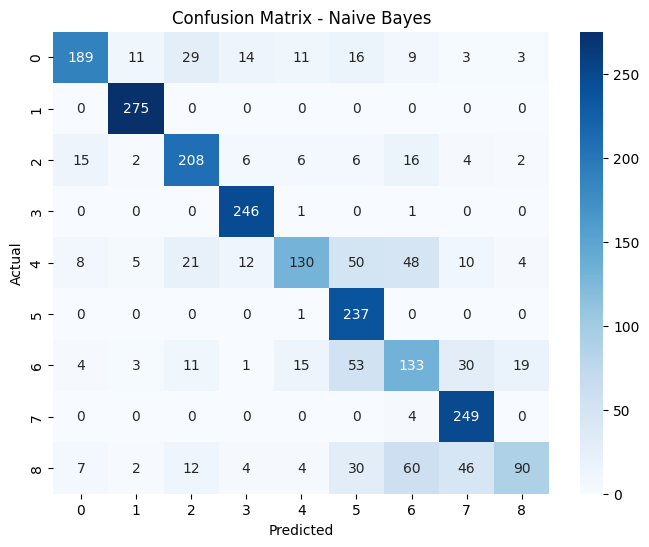

Model: Logistic Regression
Accuracy: 0.8063973063973064
Precision: 0.8001047947106945
Recall: 0.8063973063973064
F1 Score: 0.8017017036679095


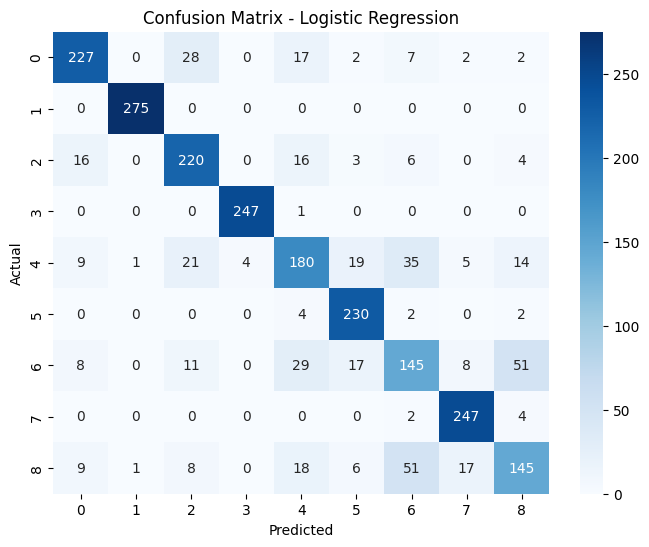

Model: Decision Tree
Accuracy: 0.7609427609427609
Precision: 0.7610938120521904
Recall: 0.7609427609427609
F1 Score: 0.7601702317625408


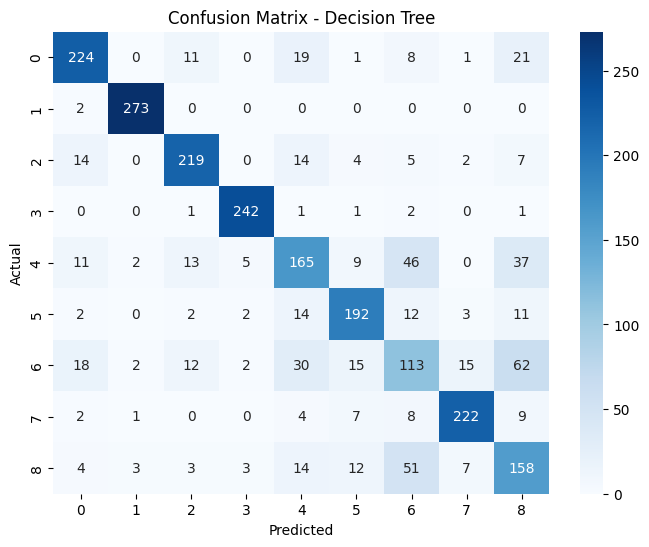

Model: Random Forest
Accuracy: 0.8800505050505051
Precision: 0.8834877487771924
Recall: 0.8800505050505051
F1 Score: 0.880725035357807


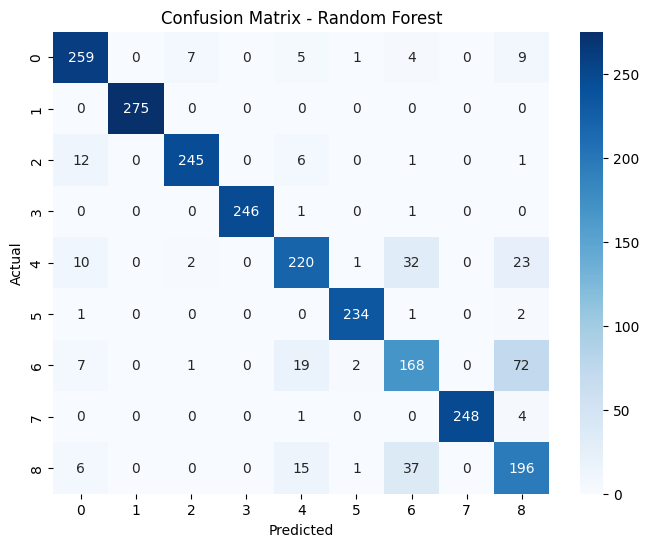

Model: Support Vector Machine
Accuracy: 0.86489898989899
Precision: 0.8759921092544275
Recall: 0.86489898989899
F1 Score: 0.8678428755453912


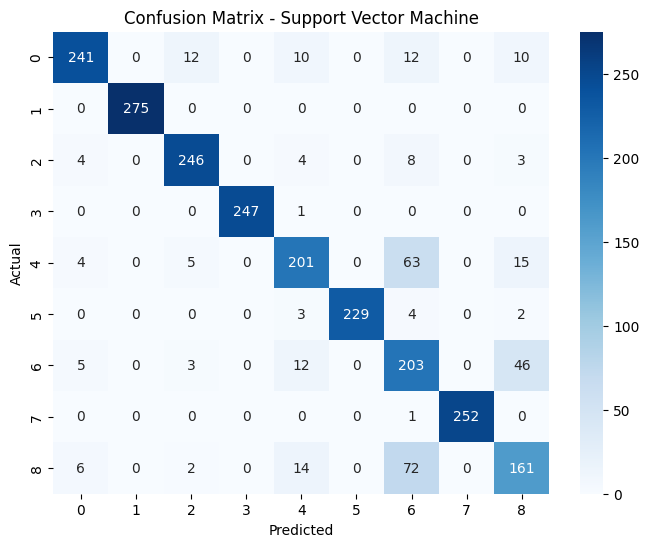

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

# Model Building
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Testing Accuracies of each model
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

In [20]:
x_test

<2376x9086 sparse matrix of type '<class 'numpy.float64'>'
	with 76373 stored elements in Compressed Sparse Row format>

In [21]:
x_test

<2376x9086 sparse matrix of type '<class 'numpy.float64'>'
	with 76373 stored elements in Compressed Sparse Row format>

Model Evaluation for Logistic Regression

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the labels for the test set
y_pred_test = models['Logistic Regression'].predict(x_test)
y_pred = model.predict(x_test)

# Calculate the accuracy score
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_score_test = precision_score(y_test, y_pred_test, average='weighted')
recall_score_test = recall_score(y_test, y_pred_test, average='weighted')
f1_score_test = f1_score(y_test, y_pred_test, average='weighted')

# Print the testing accuracy
print(f'Model Evaluation Metrics For Logistic Regression.')
print(f'Testing Scores:\n\tAccuracy = {accuracy_test}\n\tPrecision = {precision_score_test}\n\tRecall = {recall_score_test}\n\tF1-Score = {f1_score_test}')

# Predict the labels for the train set
y_train_pred = models['Naive Bayes'].predict(x_train)
y_pred = model.predict(x_test)

# Calculate the Training score
accuracy_test = accuracy_score(y_train, y_train_pred)
precision_score_test = precision_score(y_train, y_train_pred, average='weighted')
recall_score_test = recall_score(y_train, y_train_pred, average='weighted')
f1_score_test = f1_score(y_train, y_train_pred, average='weighted')

# Print the testing accuracy
print(f'Training Scores:\n\tAccuracy = {accuracy_test}\n\tPrecision = {precision_score_test}\n\tRecall = {recall_score_test}\n\tF1-Score = {f1_score_test}')

Model Evaluation Metrics For Logistic Regression.
Testing Scores:
	Accuracy = 0.8063973063973064
	Precision = 0.8001047947106945
	Recall = 0.8063973063973064
	F1-Score = 0.8017017036679095
Training Scores:
	Accuracy = 0.8371212121212122
	Precision = 0.8450464428808819
	Recall = 0.8371212121212122
	F1-Score = 0.8314984279993023


Model Evaluation for Naive Bayes

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the labels for the test set
y_pred_test = models['Naive Bayes'].predict(x_test)
y_pred = model.predict(x_test)

# Calculate the accuracy score
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_score_test = precision_score(y_test, y_pred_test, average='weighted')
recall_score_test = recall_score(y_test, y_pred_test, average='weighted')
f1_score_test = f1_score(y_test, y_pred_test, average='weighted')

# Print the testing accuracy
print(f'Model Evaluation Metrics For Naive Bayes.')
print(f'Testing Scores:\n\tAccuracy = {accuracy_test}\n\tPrecision = {precision_score_test}\n\tRecall = {recall_score_test}\n\tF1-Score = {f1_score_test}')

# Predict the labels for the train set
y_train_pred = models['Naive Bayes'].predict(x_train)
y_pred = model.predict(x_test)

# Calculate the Training score
accuracy_test = accuracy_score(y_train, y_train_pred)
precision_score_test = precision_score(y_train, y_train_pred, average='weighted')
recall_score_test = recall_score(y_train, y_train_pred, average='weighted')
f1_score_test = f1_score(y_train, y_train_pred, average='weighted')

# Print the testing accuracy
print(f'Training Scores:\n\tAccuracy = {accuracy_test}\n\tPrecision = {precision_score_test}\n\tRecall = {recall_score_test}\n\tF1-Score = {f1_score_test}')


Model Evaluation Metrics For Naive Bayes.
Testing Scores:
	Accuracy = 0.7394781144781145
	Precision = 0.7510591491340766
	Recall = 0.7394781144781145
	F1-Score = 0.7231961826028726
Training Scores:
	Accuracy = 0.8371212121212122
	Precision = 0.8450464428808819
	Recall = 0.8371212121212122
	F1-Score = 0.8314984279993023


Model Evaluation for Random Forest

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the labels for the test set
y_pred_test = models['Random Forest'].predict(x_test)
y_pred = model.predict(x_test)

# Calculate the accuracy score
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_score_test = precision_score(y_test, y_pred_test, average='weighted')
recall_score_test = recall_score(y_test, y_pred_test, average='weighted')
f1_score_test = f1_score(y_test, y_pred_test, average='weighted')

# Print the testing accuracy
print(f'Model Evaluation Metrics For Random Forest.')
print(f'Testing Scores:\n\tAccuracy = {accuracy_test}\n\tPrecision = {precision_score_test}\n\tRecall = {recall_score_test}\n\tF1-Score = {f1_score_test}')

# Predict the labels for the train set
y_train_pred = models['Random Forest'].predict(x_train)
y_pred = model.predict(x_test)

# Calculate the Training score
accuracy_test = accuracy_score(y_train, y_train_pred)
precision_score_test = precision_score(y_train, y_train_pred, average='weighted')
recall_score_test = recall_score(y_train, y_train_pred, average='weighted')
f1_score_test = f1_score(y_train, y_train_pred, average='weighted')

# Print the testing accuracy
print(f'Training Scores:\n\tAccuracy = {accuracy_test}\n\tPrecision = {precision_score_test}\n\tRecall = {recall_score_test}\n\tF1-Score = {f1_score_test}')

Model Evaluation Metrics For Random Forest.
Testing Scores:
	Accuracy = 0.8800505050505051
	Precision = 0.8834877487771924
	Recall = 0.8800505050505051
	F1-Score = 0.880725035357807
Training Scores:
	Accuracy = 0.9890572390572391
	Precision = 0.9891798348833745
	Recall = 0.9890572390572391
	F1-Score = 0.9890784574620812


Model Evaluation Metrics For Decision Tree Classifier.

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the labels for the test set
y_pred_test = models['Decision Tree'].predict(x_test)
y_pred = model.predict(x_test)

# Calculate the accuracy score
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_score_test = precision_score(y_test, y_pred_test, average='weighted')
recall_score_test = recall_score(y_test, y_pred_test, average='weighted')
f1_score_test = f1_score(y_test, y_pred_test, average='weighted')

# Print the testing accuracy
print(f'Model Evaluation Metrics For Decision Tree.')
print(f'Testing Scores:\n\tAccuracy = {accuracy_test}\n\tPrecision = {precision_score_test}\n\tRecall = {recall_score_test}\n\tF1-Score = {f1_score_test}')

# Predict the labels for the train set
y_train_pred = models['Naive Bayes'].predict(x_train)
y_pred = model.predict(x_test)

# Calculate the Training score
accuracy_test = accuracy_score(y_train, y_train_pred)
precision_score_test = precision_score(y_train, y_train_pred, average='weighted')
recall_score_test = recall_score(y_train, y_train_pred, average='weighted')
f1_score_test = f1_score(y_train, y_train_pred, average='weighted')

# Print the testing accuracy
print(f'Training Scores:\n\tAccuracy = {accuracy_test}\n\tPrecision = {precision_score_test}\n\tRecall = {recall_score_test}\n\tF1-Score = {f1_score_test}')


Model Evaluation Metrics For Decision Tree.
Testing Scores:
	Accuracy = 0.7609427609427609
	Precision = 0.7610938120521904
	Recall = 0.7609427609427609
	F1-Score = 0.7601702317625408
Training Scores:
	Accuracy = 0.8371212121212122
	Precision = 0.8450464428808819
	Recall = 0.8371212121212122
	F1-Score = 0.8314984279993023


Model Evaluation Metrics For Logistic Regression.

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the labels for the test set
y_pred_test = models['Support Vector Machine'].predict(x_test)
y_pred = model.predict(x_test)

# Calculate the accuracy score
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_score_test = precision_score(y_test, y_pred_test, average='weighted')
recall_score_test = recall_score(y_test, y_pred_test, average='weighted')
f1_score_test = f1_score(y_test, y_pred_test, average='weighted')

# Print the testing accuracy
print(f'Model Evaluation Metrics For SVM.')
print(f'Testing Scores:\n\tAccuracy = {accuracy_test}\n\tPrecision = {precision_score_test}\n\tRecall = {recall_score_test}\n\tF1-Score = {f1_score_test}')

# Predict the labels for the train set
y_train_pred = models['Naive Bayes'].predict(x_train)
y_pred = model.predict(x_test)

# Calculate the Training score
accuracy_test = accuracy_score(y_train, y_train_pred)
precision_score_test = precision_score(y_train, y_train_pred, average='weighted')
recall_score_test = recall_score(y_train, y_train_pred, average='weighted')
f1_score_test = f1_score(y_train, y_train_pred, average='weighted')

# Print the testing accuracy
print(f'Training Scores:\n\tAccuracy = {accuracy_test}\n\tPrecision = {precision_score_test}\n\tRecall = {recall_score_test}\n\tF1-Score = {f1_score_test}')

Model Evaluation Metrics For SVM.
Testing Scores:
	Accuracy = 0.86489898989899
	Precision = 0.8759921092544275
	Recall = 0.86489898989899
	F1-Score = 0.8678428755453912
Training Scores:
	Accuracy = 0.8371212121212122
	Precision = 0.8450464428808819
	Recall = 0.8371212121212122
	F1-Score = 0.8314984279993023


In [27]:
from sklearn import svm
from sklearn.metrics import roc_auc_score

# Create the SVC model with probability=True
model = svm.SVC(probability=True)

# Fit the model
model.fit(x_train, y_train)

# ROC/AUC Curve
y_probs = model.predict_proba(x_test)
macro_roc_auc_ovr = roc_auc_score(y_test, y_probs, multi_class="ovr", average="macro")
print(f"ROC AUC Score (Macro): {macro_roc_auc_ovr}")

ROC AUC Score (Macro): 0.9842020339661054


Get Predictions

To Get predictions, we're using most accurate model, Support Vector Machine (SVM)
 

In [33]:
# Predict on new datanew_comment = "The food was delicious and the service was great!"

new_comment = "Bad product"
new_comment_preprocessed = text_preprocessing(new_comment)
new_comment_vectorized = tfidf_vectorizer.transform([new_comment_preprocessed])
predictions = {}
for model_name, model in models.items():
    predictions[model_name] = model.predict(new_comment_vectorized)
for model_name, prediction in predictions.items():
    print(f"Predictions for {model_name}: {le.inverse_transform(prediction)}")

Predictions for Support Vector Machine: [1.]


In [34]:
%pip install joblib
import joblib

# Save the SVM model as a pickle file
joblib.dump(model, 'svm_model.pkl')

Note: you may need to restart the kernel to use updated packages.


['svm_model.pkl']

In [29]:
# prompt: Give the code to get predictions

# Predict on new datanew_comment = "The food was delicious and the service was great!"
new_comment_preprocessed = text_preprocessing(new_comment)
new_comment_vectorized = tfidf_vectorizer.transform([new_comment_preprocessed])

prediction = model.predict(new_comment_vectorized)
print(f"Predicted Rating: {le.inverse_transform(prediction)}")


Predicted Rating: [5.]


In [30]:
# %pip install joblib
# import joblib

# # Save the SVM model as a pickle file
# joblib.dump(model, 'svm_model.pkl')

In [31]:
# Split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)
models = {
    'Support Vector Machine': SVC()
}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

Predicted Rating: [5.]
